# Classificació

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Abans de començar podem veure la funció logística o sigmoide.

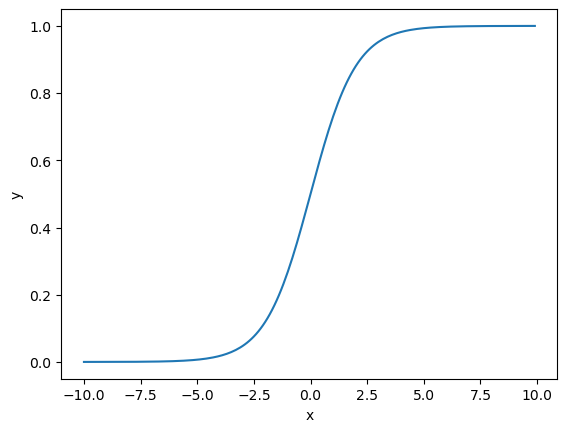

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-10, 10, 0.1)
y = sigmoid(X)

plt.plot(X, y)
plt.xlabel('x')
plt.ylabel('y');

## Exemple: Heart disease (regressió logística)

El data set que farem servir avui també és del repositori UCI. Ens serveix per classificar si un pacient té una malaltia de cor o no.

https://archive.ics.uci.edu/ml/datasets/heart+disease

Treballs similars fets amb aquest mateix data set:
- https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning
- https://www.kaggle.com/code/fahada8/heart-disease-prediction

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd

df = pd.read_csv('./DataSets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# values count
# unique
df["target"].nunique()

2

In [6]:
df["target"].unique()

array([1, 0])

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Una bona manera de començar és assegurant-nos que entenem bé les variables que tenim:
- 3 age: age in years
- 4 sex: sex (1 = male; 0 = female)
- 9 cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- 12 chol: serum cholestoral in mg/dl
- 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 19 restecg: resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- 32 thalach: maximum heart rate achieved
- 38 exang: exercise induced angina (1 = yes; 0 = no)
- 40 oldpeak = ST depression induced by exercise relative to rest
- 41 slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- 44 ca: number of major vessels (0-3) colored by flourosopy
- 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- 58 num: diagnosis of heart disease (angiographic disease status) (Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)

Per comoditat, hem canviat els noms de les variables, de manera que són més intuititus.

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Una altra acció molt útil és aprofitar que sabem el significat de cada categoria per canviar-

In [10]:
import warnings # Provar què passa si el treiem
warnings.filterwarnings('ignore')

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

### Visualització de les dades

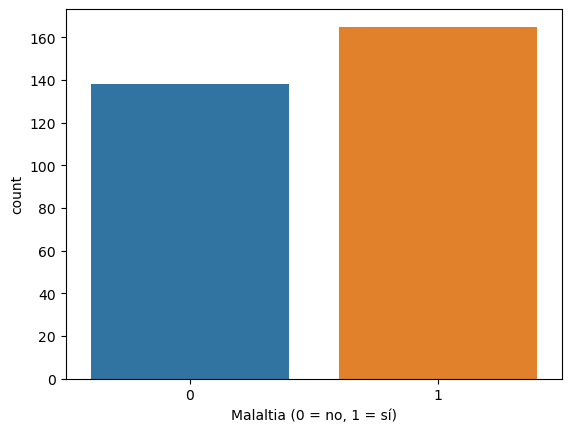

Percentatge de pacients malalts: 45.54%
Percentatge de pacients sans: 54.46%


In [11]:
sns.countplot(x = "target", data = df)
plt.xlabel("Malaltia (0 = no, 1 = sí)")
plt.show()

print("Percentatge de pacients malalts: {:.2f}%".format((len(df[df.target == 0]) / (len(df.target)) * 100)))
print("Percentatge de pacients sans: {:.2f}%".format((len(df[df.target == 1]) / (len(df.target)) * 100)))

In [12]:
taula = pd.crosstab(df.sex, df.target)
taula

target,0,1
sex,,
female,24,72
male,114,93


<Figure size 700x500 with 0 Axes>

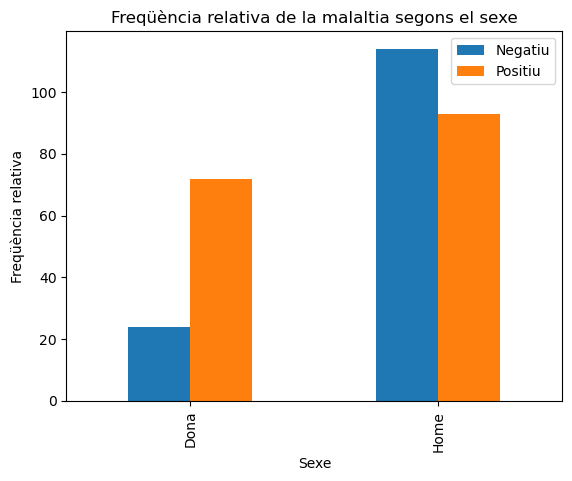

In [13]:
plt.figure(figsize=(7,5))
taula.plot(kind = 'bar')
plt.title('Freqüència relativa de la malaltia segons el sexe')
plt.xticks(ticks=[0,1],labels=["Dona", "Home"])
plt.xlabel("Sexe")
plt.legend(["Negatiu", "Positiu"])
plt.ylabel('Freqüència relativa')
plt.show()

### One-hot encoding

Fins ara hem treballat principalment amb variables independents numèriques. Quan tenim variables $X$ que són categòriques, les tractem de manera diferent. Per exemple, si una categòrica té els nivells 0, 1, 2 i 3, creem variables binàries "dummies":

- X0 sí o no
- X1 sí o no
- X2 sí o no

Per crear els dummies ens hem d'assegurar que les variables categòriques no són numèriques, i en cas de ser-ho passar-les a object o category.

In [14]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [15]:
df['age'].astype(object)

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

In [16]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [17]:
df = pd.get_dummies(df, drop_first = True) # Si tenim k categories fem k-1 dummies

In [18]:
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1


In [19]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

### Regressió Logística

In [21]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

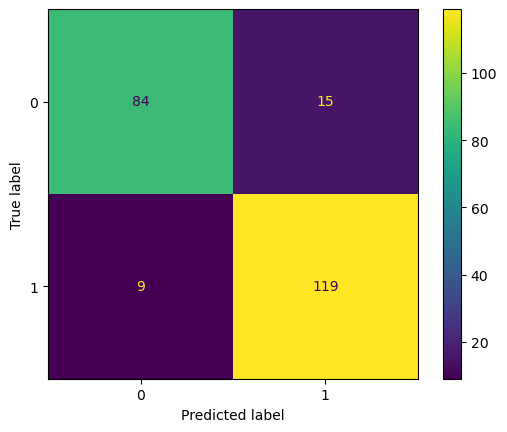

In [22]:
y_pred = logistic.predict(X_train)
confusio = confusion_matrix(y_train.values, y_pred)
ConfusionMatrixDisplay(confusio).plot();

### Dades estandaritzades

In [23]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_train)

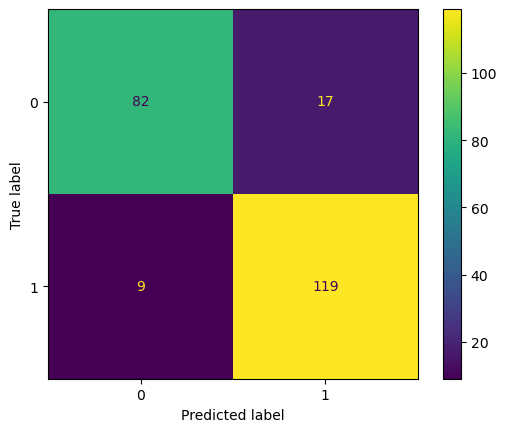

In [24]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)
y_pred = logistic.predict(X_train_std)
confusio = confusion_matrix(y_train.values, y_pred)
ConfusionMatrixDisplay(confusio).plot();

In [25]:
print(classification_report(y_train.values, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        99
           1       0.88      0.93      0.90       128

    accuracy                           0.89       227
   macro avg       0.89      0.88      0.88       227
weighted avg       0.89      0.89      0.88       227



In [26]:
total = np.sum(confusio)

TP = confusio[1,1]
TN = confusio[0,0]

FP = confusio[0,1]
FN = confusio[1,0]

precision = TP / (TP + FP)
print('Precision: ', precision)

recall = TP / (TP + FN)
print('Recall: ', recall )

F1 = 2 * TP / (2 * TP + FN + FP)
print('F1-Score: ', F1)

accuracy = (TP + TN) / (TP + FN + TN + FP)
print('Accuracy: ', accuracy)

Precision:  0.875
Recall:  0.9296875
F1-Score:  0.9015151515151515
Accuracy:  0.8854625550660793


---
## Exemple: Iris (k-NN)

In [27]:
from sklearn import neighbors
from sklearn.datasets import load_iris
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
X = load_iris().data[:,0:2]
y = load_iris().target

In [30]:
# X_std = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [31]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn1_std = neighbors.KNeighborsClassifier(n_neighbors = 1)

knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3_std = neighbors.KNeighborsClassifier(n_neighbors = 3)

knn20 = neighbors.KNeighborsClassifier(n_neighbors = 20)
knn20_std = neighbors.KNeighborsClassifier(n_neighbors = 20)

knn1.fit(X_train, y_train)
knn1_std.fit(X_train_std, y_train)
knn3.fit(X_train, y_train)
knn3_std.fit(X_train_std, y_train)
knn20.fit(X_train, y_train)
knn20_std.fit(X_train_std, y_train);

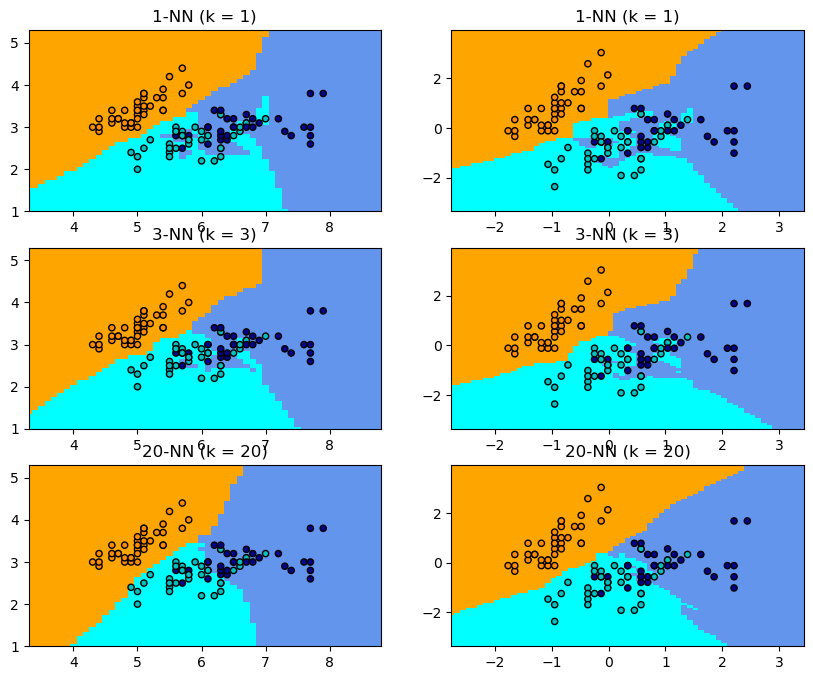

In [32]:
from matplotlib.colors import ListedColormap

precision = 0.1
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, precision),
                     np.arange(y_min, y_max, precision))

x_min_std, x_max_std = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min_std, y_max_std = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx_std, yy_std = np.meshgrid(np.arange(x_min_std, x_max_std, precision),
                     np.arange(y_min_std, y_max_std, precision))

fig, ax = plt.subplots(3, 2, figsize = (10, 8))

for idx, clf, xx, yy, X, Y in zip([[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]],
                    [knn1, knn1_std, knn3, knn3_std, knn20, knn20_std],
                    [xx, xx_std, xx, xx_std, xx, xx_std],
                    [yy, yy_std, yy, yy_std, yy, yy_std],
                    [X_train, X_train_std, X_train, X_train_std, X_train, X_train_std],
                    [y_train, y_train, y_train, y_train, y_train, y_train]):
    Z = clf.predict(np.c_[xx.reshape(-1), yy.reshape(-1)])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[idx[0], idx[1]].pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    ax[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = Y, cmap = cmap_bold,
                edgecolor = 'k', s = 20)

    ax[idx[0], idx[1]].set_xlim(xx.min(), xx.max())
    ax[idx[0], idx[1]].set_ylim(yy.min(), yy.max())
    ax[idx[0], idx[1]].set_title("{}-NN (k = {})".format(clf.n_neighbors, clf.n_neighbors))

plt.show()

#### Distàncies (mètriques) diferents

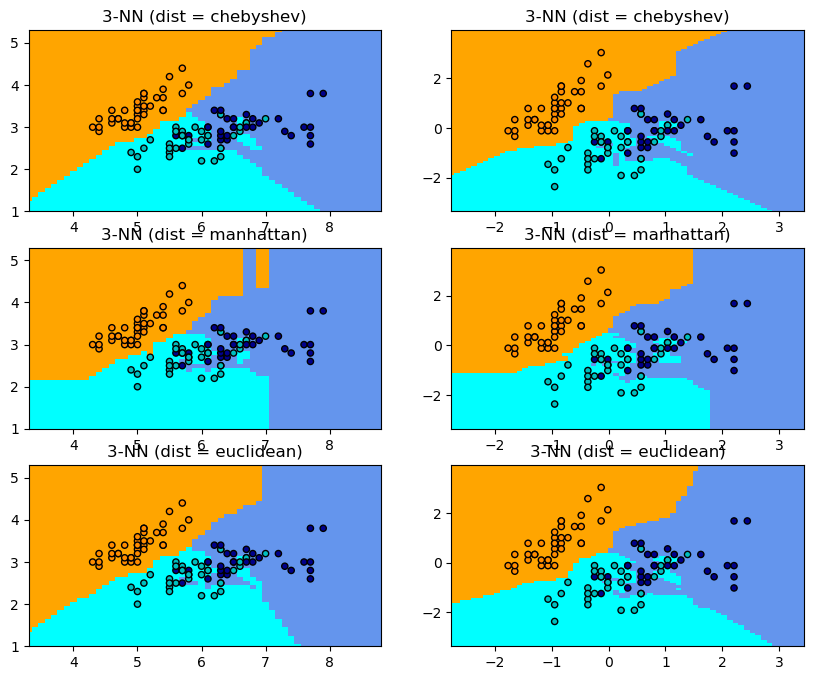

In [33]:
knn_cheb = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'chebyshev')
knn_cheb_std = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'chebyshev')

knn_manh = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'manhattan')
knn_manh_std = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'manhattan')

knn_eucl = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'euclidean')
knn_eucl_std = neighbors.KNeighborsClassifier(n_neighbors = 3,
                                     metric = 'euclidean')

knn_cheb.fit(X_train, y_train)
knn_cheb_std.fit(X_train_std, y_train)
knn_manh.fit(X_train, y_train)
knn_manh_std.fit(X_train_std, y_train)
knn_eucl.fit(X_train, y_train)
knn_eucl_std.fit(X_train_std, y_train)

precision = 0.1
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, precision),
                     np.arange(y_min, y_max, precision))

x_min_std, x_max_std = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min_std, y_max_std = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx_std, yy_std = np.meshgrid(np.arange(x_min_std, x_max_std, precision),
                     np.arange(y_min_std, y_max_std, precision))

fig, ax = plt.subplots(3, 2, figsize = (10, 8))

for idx, clf, xx, yy, X, Y in zip([[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]],
                    [knn_cheb, knn_cheb_std, knn_manh, knn_manh_std, knn_eucl, knn_eucl_std],
                    [xx, xx_std, xx, xx_std, xx, xx_std],
                    [yy, yy_std, yy, yy_std, yy, yy_std],
                    [X_train, X_train_std, X_train, X_train_std, X_train, X_train_std],
                    [y_train, y_train, y_train, y_train, y_train, y_train]):
    Z = clf.predict(np.c_[xx.reshape(-1), yy.reshape(-1)])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[idx[0], idx[1]].pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    ax[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = Y, cmap = cmap_bold,
                edgecolor = 'k', s = 20)

    ax[idx[0], idx[1]].set_xlim(xx.min(), xx.max())
    ax[idx[0], idx[1]].set_ylim(yy.min(), yy.max())
    ax[idx[0], idx[1]].set_title("{}-NN (dist = {})".format(clf.n_neighbors, clf.metric))

plt.show()

In [34]:
knn_cheb

KNeighborsClassifier(metric='chebyshev', n_neighbors=3)

### Prediccions amb k=3

In [35]:
X = load_iris().data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

df = pd.concat((pd.DataFrame(X), pd.DataFrame(y, columns=["target"])), axis = 1)

0.9714285714285714


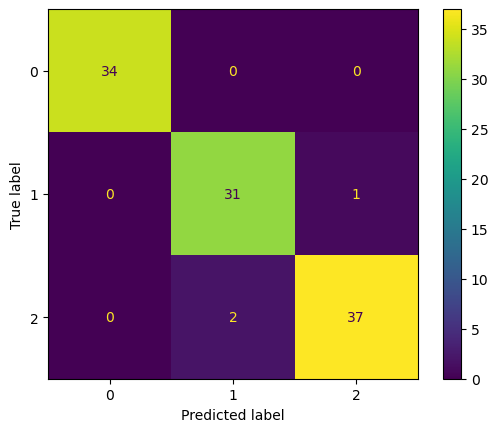

In [36]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train_std, y_train)
y_pred = knn3.predict(X_train_std)
print(accuracy_score(y_train, y_pred))
confusio = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(confusio).plot();

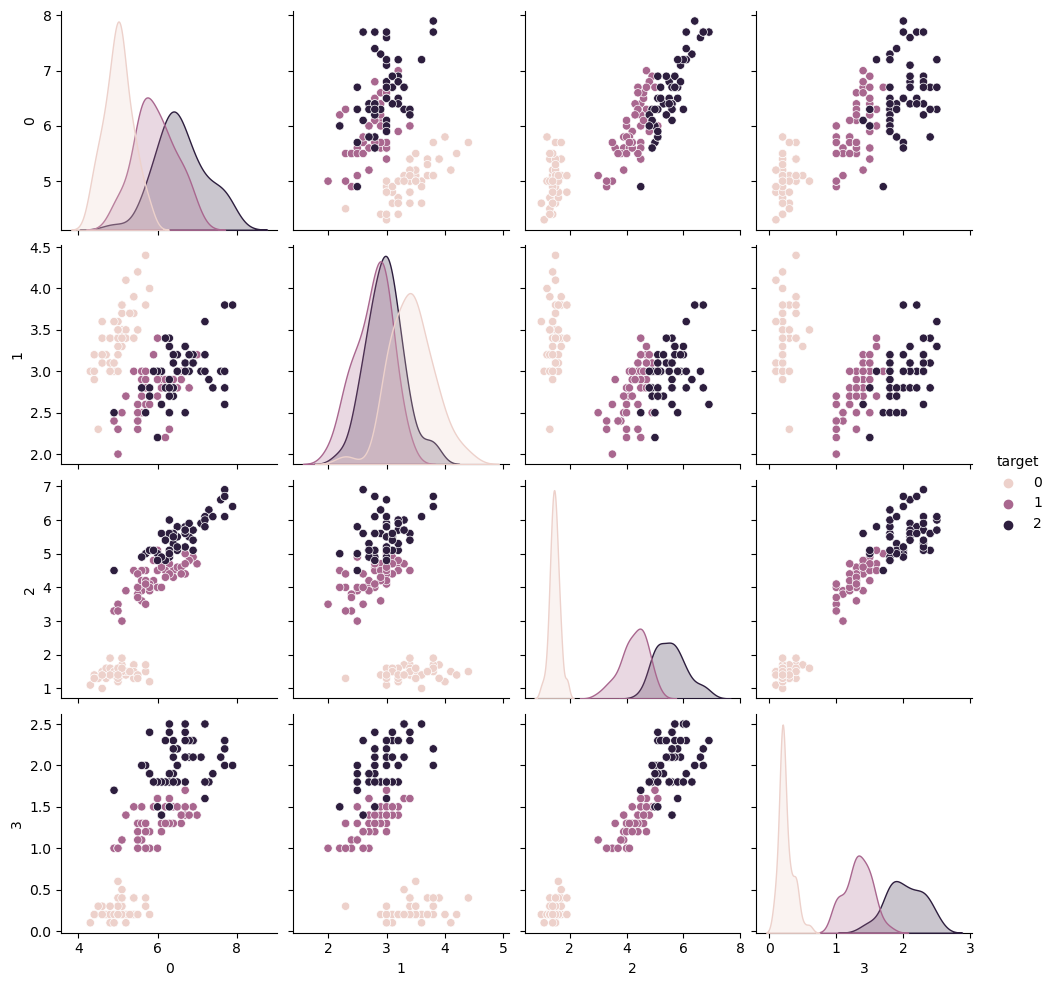

In [37]:
sns.pairplot(df, hue="target")

In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.97      0.95        32
           2       0.97      0.95      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



0.9777777777777777


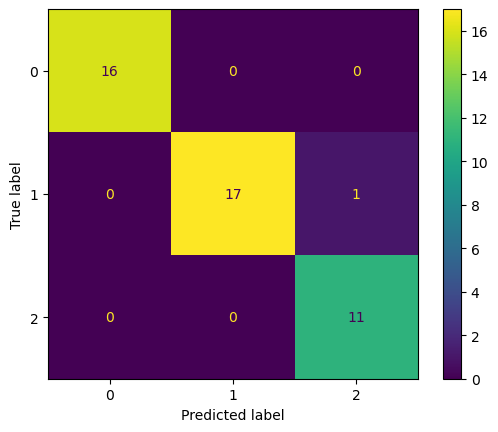

In [39]:
y_pred_test = knn3.predict(X_test_std)
print(accuracy_score(y_test, y_pred_test))
confusio = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusio).plot();

### Escollir el valor de $k$: Validació creuada

Comencem mirant-ho amb un bucle i comparant el train i el test (cosa que a la pràctica no faríem).

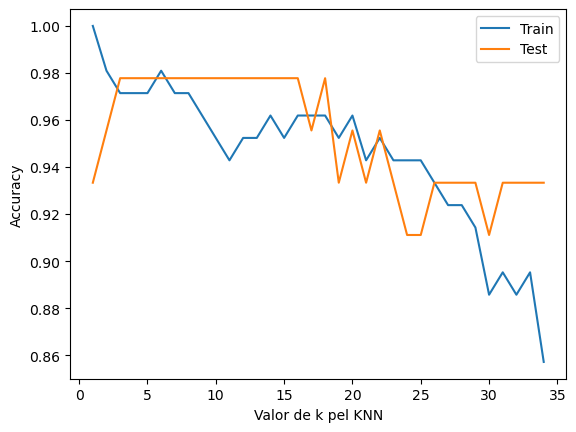

In [40]:
train_scores = []
test_scores = []

for k in range(1, 35):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train)

    y_pred = knn.predict(X_train_std)
    train_scores.append(accuracy_score(y_train, y_pred))

    y_pred_test = knn.predict(X_test_std)
    test_scores.append(accuracy_score(y_test, y_pred_test))

plt.plot(range(1, 35), train_scores, label = 'Train')
plt.plot(range(1, 35), test_scores, label = 'Test')
plt.xlabel('Valor de k pel KNN')
plt.legend()
plt.ylabel('Accuracy');

En el fons no ho sabem! (I tampoc és una mesura perfecta, un altre test podria donar una altra k)

In [41]:
np.argmax(test_scores)

2

Ara fem servir la validació creuada:

1NN classifier: 0.934 (+/- 0.0745)
2NN classifier: 0.944 (+/- 0.0461)
3NN classifier: 0.924 (+/- 0.0955)
4NN classifier: 0.944 (+/- 0.0643)
5NN classifier: 0.963 (+/- 0.0457)
6NN classifier: 0.953 (+/- 0.0474)


7NN classifier: 0.944 (+/- 0.0615)
8NN classifier: 0.953 (+/- 0.0474)
9NN classifier: 0.943 (+/- 0.0648)
10NN classifier: 0.943 (+/- 0.0648)
11NN classifier: 0.943 (+/- 0.0648)
12NN classifier: 0.943 (+/- 0.0648)
13NN classifier: 0.952 (+/- 0.0658)
14NN classifier: 0.953 (+/- 0.0652)
15NN classifier: 0.953 (+/- 0.0652)
16NN classifier: 0.962 (+/- 0.0648)
17NN classifier: 0.935 (+/- 0.0742)
18NN classifier: 0.944 (+/- 0.0643)
19NN classifier: 0.934 (+/- 0.0625)
20NN classifier: 0.945 (+/- 0.0609)


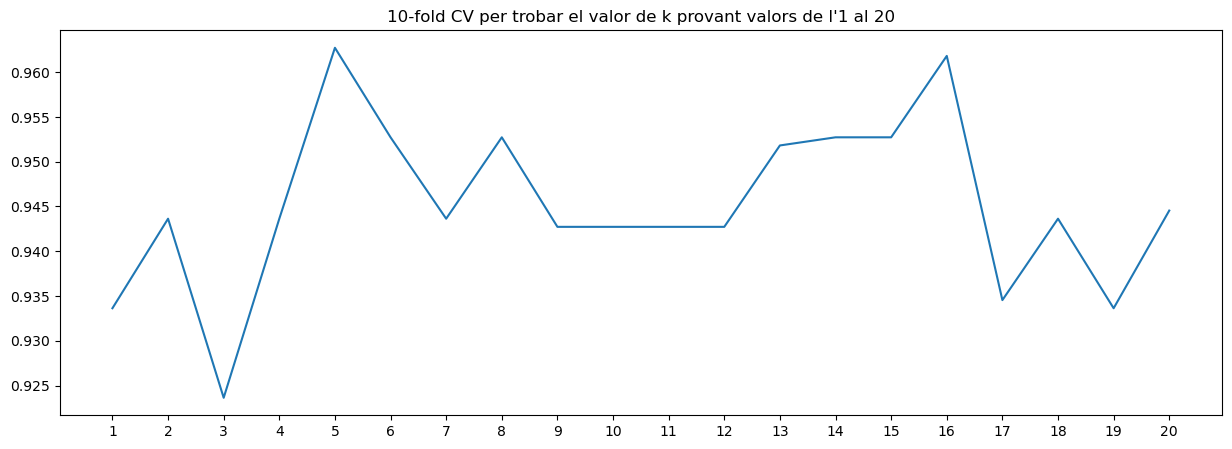

In [42]:
maxk = 20
models = []
noms = [str(k) + 'NN classifier' for k in range(1, maxk + 1)]

for k in range(1, maxk + 1): models.append(neighbors.KNeighborsClassifier(n_neighbors = k))
resultats_val = []

for nom, model in zip(noms, models):

    scores_val = cross_val_score(model, X_train_std, y_train, cv = 10, scoring = 'accuracy')
    resultats_val.append(scores_val.mean())

    print(f"{nom}: {np.mean(scores_val):.3} (+/- {np.std(scores_val):.3})")

plt.figure(figsize=(15,5))
plt.plot(np.arange(1,21),resultats_val)
plt.title("10-fold CV per trobar el valor de k provant valors de l'1 al 20")
plt.xticks(np.arange(1,21));

In [43]:
print("Nombre òptim de veïns: ", np.argmax(resultats_val)+1)

Nombre òptim de veïns:  5


---
### SVM (Support Vector Machine)

Per veure la classificació amb SVM en funcionament farem servir dades sintètiques. En particular, la funció `make_blobs` de l'sklearn ens permet crear núvols de dades Gaussianes. Escollim 2 centres i 2 variables per tal de poder tenir un problema de classificació binària que es pot visualitzar en dues dimensions.

In [44]:
from sklearn import datasets
from sklearn.svm import SVC

In [45]:
%pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

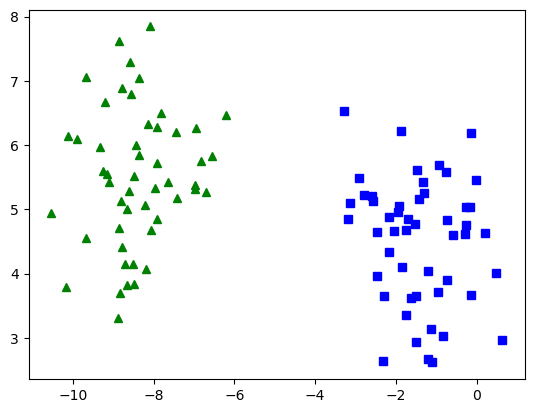

In [47]:
X, y = datasets.make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 7)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

Ara bé, com hem vist, les dades no sempre són linealment separables. En aquest cas, ens ha servit amb canviar la seed per veure un cas on la classificació ja no és directa.

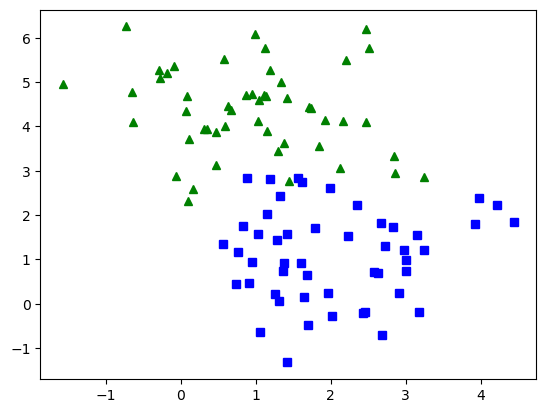

In [48]:
X, y = datasets.make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 0)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
Y[Y == 0] = -1

#### Soft Margin

Quan apliquem el soft margin estem tenint una certa tolerància a errors, que en el cas del SVC del sklearn es pondera amb el paràmetre C. Provarem diversos valors de C i els plotejarem per veure l'efecte que té.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svc#sklearn.svm.LinearSVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

In [49]:
SVC_1 = SVC(kernel = 'linear', C = 1) # default
SVC_001 = SVC(kernel = 'linear', C = 0.01) # més tolerància
SVC_20 = SVC(kernel = 'linear', C = 20) # menys tolerància

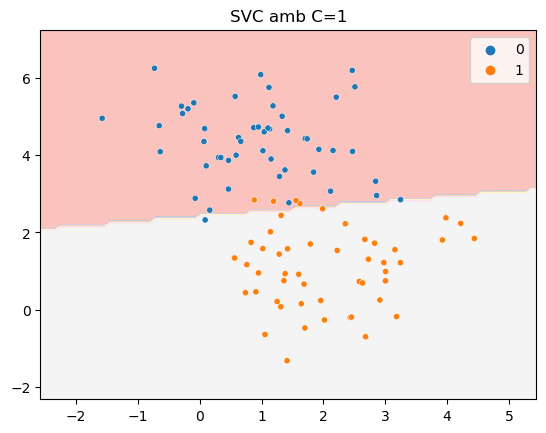

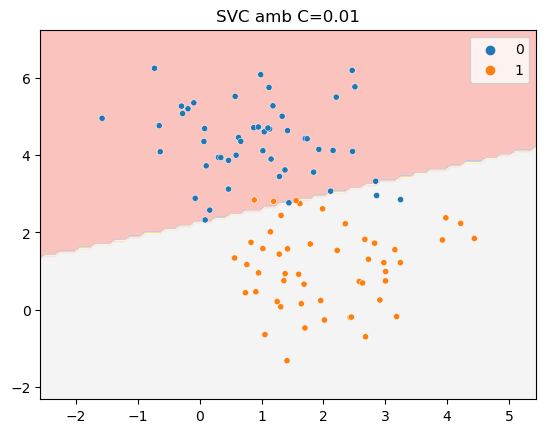

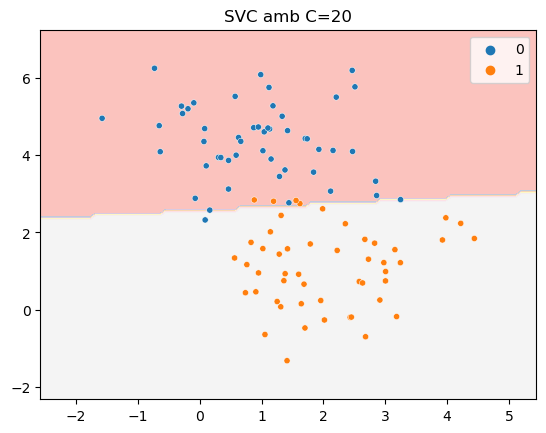

In [50]:
models = (
    SVC_1,
    SVC_001,
    SVC_20
)

models = (model.fit(X, y) for model in models)

titols = (
    "SVC amb C=1",
    "SVC amb C=0.01",
    "SVC amb C=20"
)

for model, titol in zip(models, titols):
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap="Pastel1",
        alpha=0.8
    )
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=20, edgecolors="k")
    plt.title(titol)

<Figure size 1000x500 with 0 Axes>

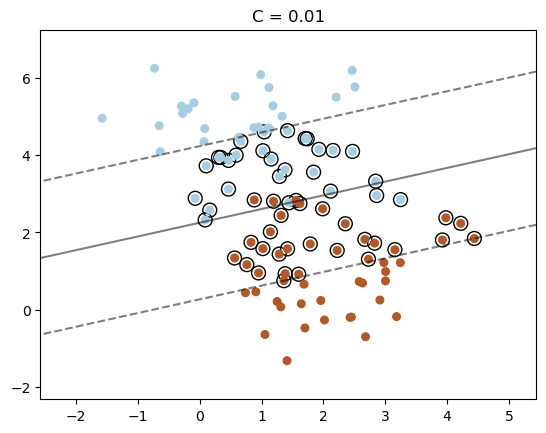

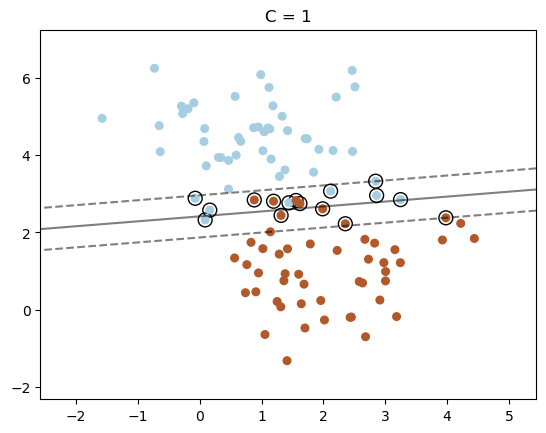

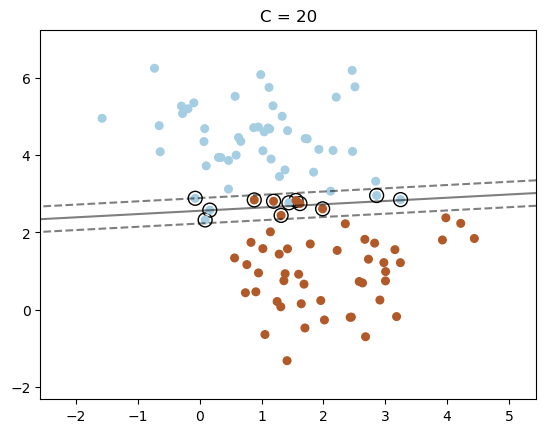

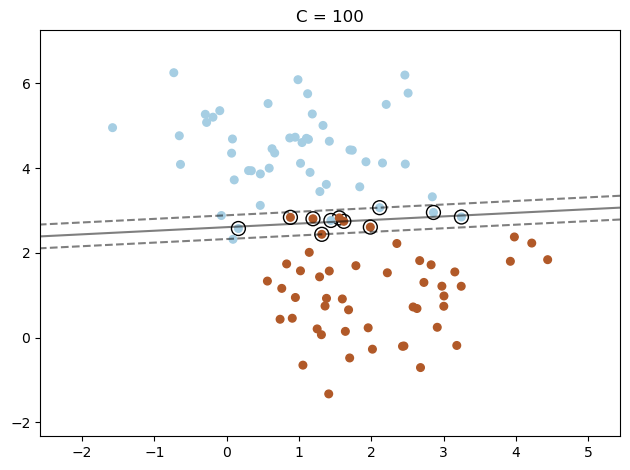

In [51]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([0.01, 1, 20, 100]):
    model = SVC(kernel="linear", C=C, random_state=7).fit(X,y)
    # Obtenir vectors suport
    funcio = model.decision_function(X) # funcio = np.dot(X, model.coef_[0]) + model.intercept_[0]
    sv_index = np.where(np.abs(funcio) <= 1 + 1e-15)[0]
    sv = X[sv_index]

    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    plt.scatter(
        sv[:, 0],
        sv[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title("C = " + str(C))
plt.tight_layout()
plt.show()

### Kernel trick

Fem servir kernels per aplicar transformacions no lineals a les dades.

In [52]:
lineal = SVC(kernel = 'linear', C = 1)
poly = SVC(kernel = 'poly', C = 1)
rbf = SVC(kernel = 'rbf', C = 1)

<Figure size 1000x500 with 0 Axes>

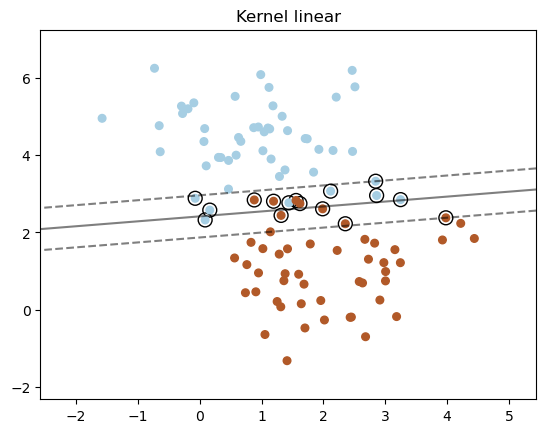

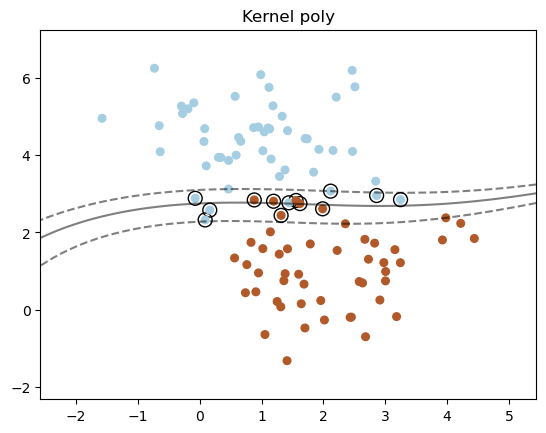

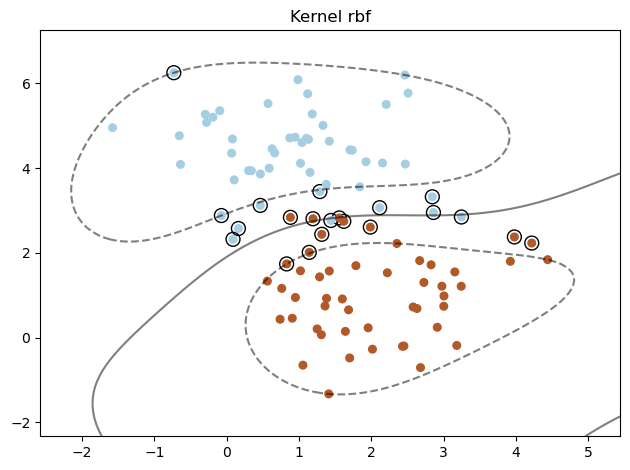

In [53]:
plt.figure(figsize=(10, 5))
for i, kernel in enumerate(["linear", "poly", "rbf"]):
    model = SVC(kernel=kernel, C=1, random_state=7).fit(X,y)
    # Obtenir vectors suport
    funcio = model.decision_function(X) # funcio = np.dot(X, model.coef_[0]) + model.intercept_[0]
    sv_index = np.where(np.abs(funcio) <= 1 + 1e-15)[0]
    sv = X[sv_index]

    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    plt.scatter(
        sv[:, 0],
        sv[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title("Kernel " + str(kernel))
plt.tight_layout()
plt.show()

A part de triar quin kernel fem servir, cada kernel té els seus propis hiperparàmetres que també hem d'escollir. Podem veure com a exemples el grau del polinòmic o la gamma del rbf.

<Figure size 1000x500 with 0 Axes>

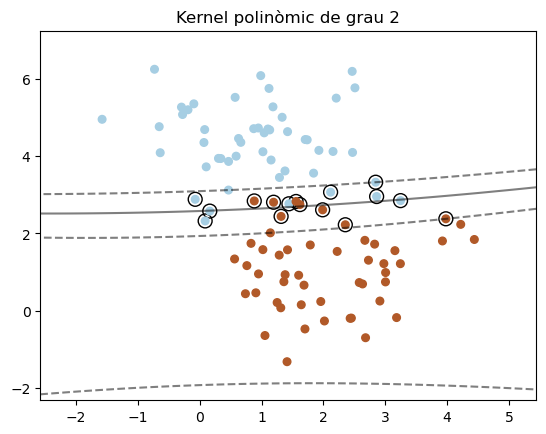

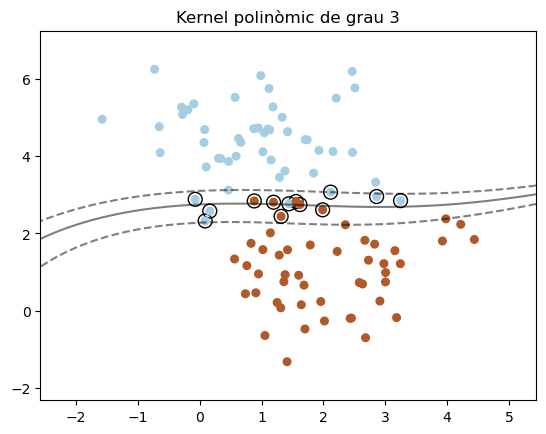

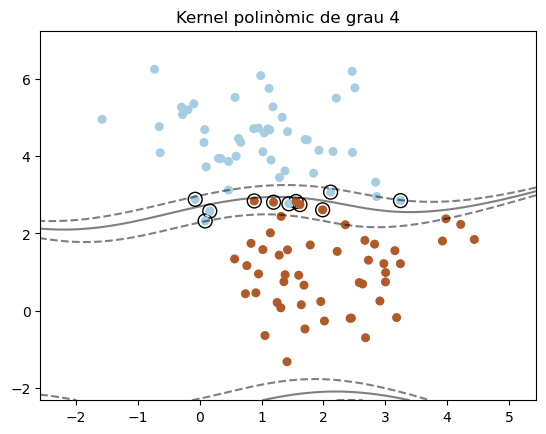

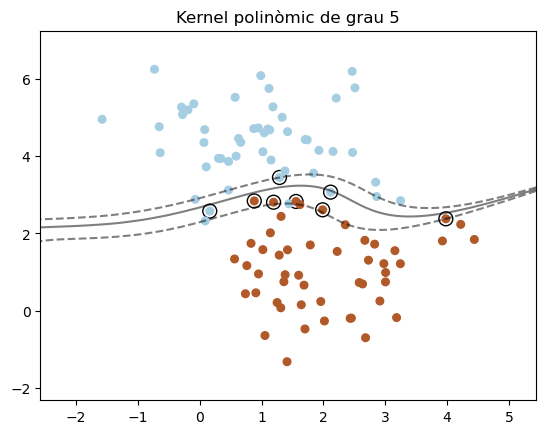

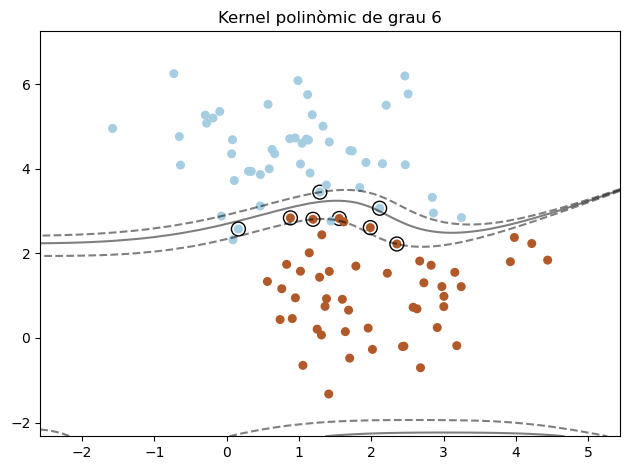

In [54]:
plt.figure(figsize=(10, 5))
for i, degree in enumerate(np.arange(2,7)):
    model = SVC(kernel="poly", C=1, degree=degree, random_state=7).fit(X,y)
    # Obtenir vectors suport
    funcio = model.decision_function(X) # funcio = np.dot(X, model.coef_[0]) + model.intercept_[0]
    sv_index = np.where(np.abs(funcio) <= 1 + 1e-15)[0]
    sv = X[sv_index]

    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    plt.scatter(
        sv[:, 0],
        sv[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title("Kernel polinòmic de grau " + str(degree))
plt.tight_layout()
plt.show()

In [55]:
np.logspace(-1.5, 1, 8)

array([ 0.03162278,  0.07196857,  0.16378937,  0.37275937,  0.8483429 ,
        1.93069773,  4.39397056, 10.        ])

<Figure size 1000x500 with 0 Axes>

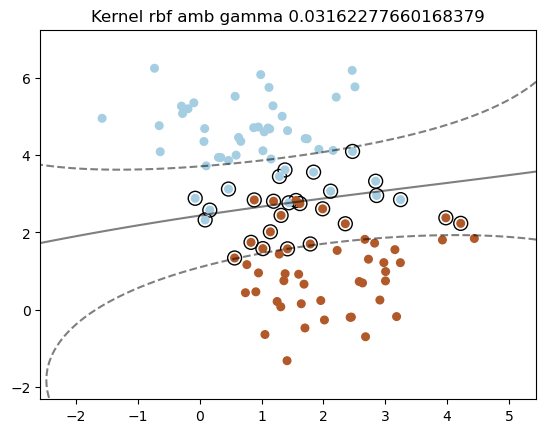

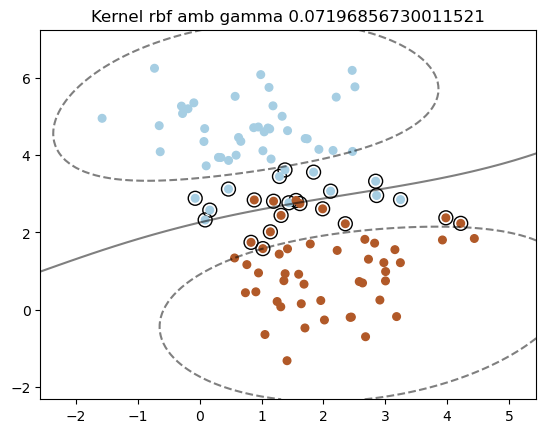

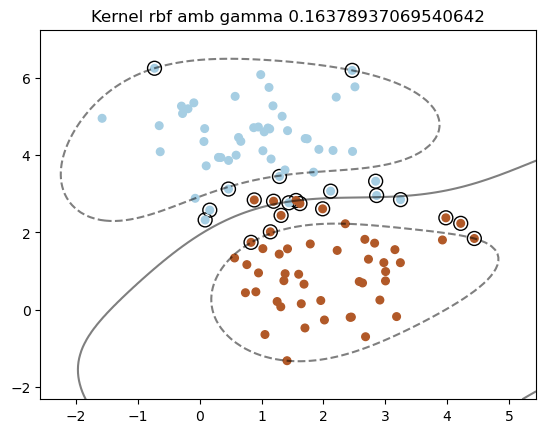

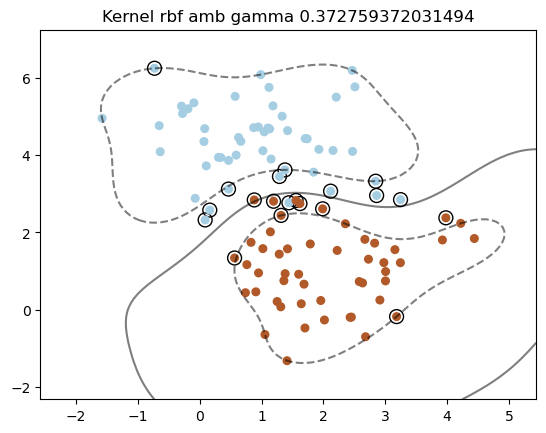

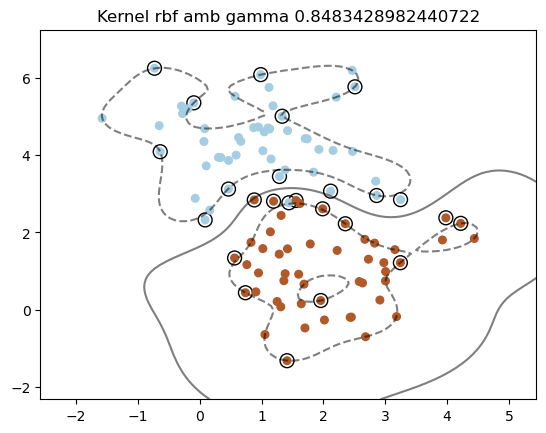

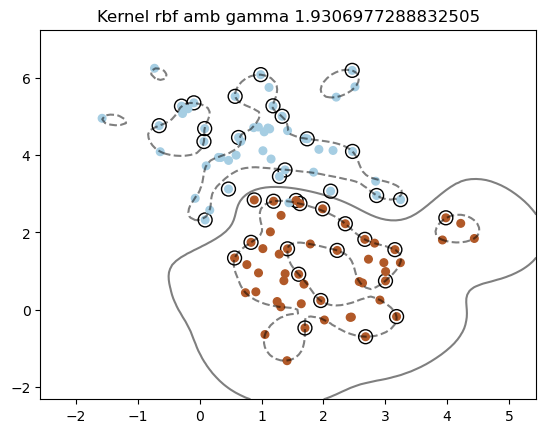

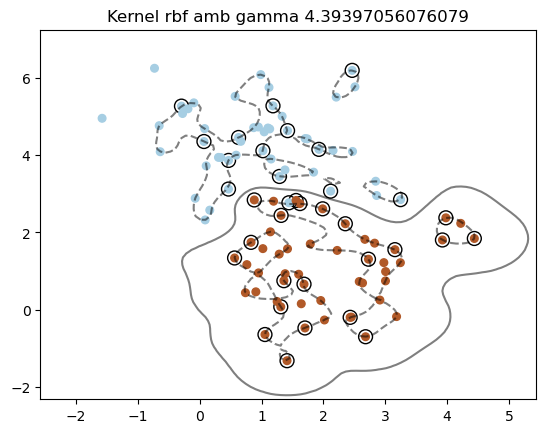

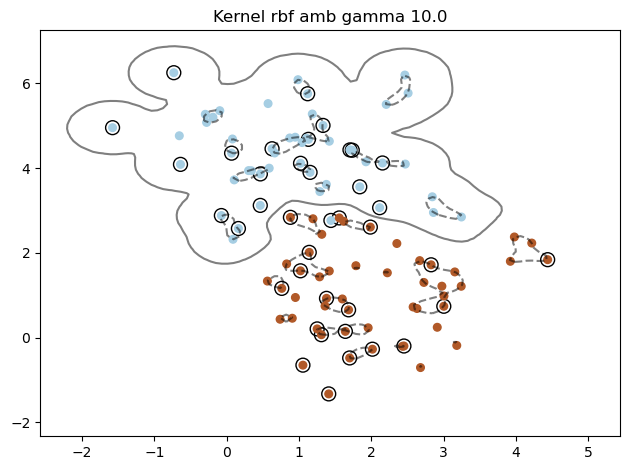

In [56]:
plt.figure(figsize=(10, 5))
for i, gamma in enumerate(np.logspace(-1.5, 1, 8)):
    model = SVC(kernel="rbf", C=1, random_state=7, gamma=gamma).fit(X,y)
    # Obtenir vectors suport
    funcio = model.decision_function(X) # funcio = np.dot(X, model.coef_[0]) + model.intercept_[0]
    sv_index = np.where(np.abs(funcio) <= 1 + 1e-15)[0]
    sv = X[sv_index]

    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    plt.scatter(
        sv[:, 0],
        sv[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title("Kernel rbf amb gamma " + str(gamma))
plt.tight_layout()
plt.show()

### Validació creuada (Heart disease)

Tornem a fer servir el data set de la malaltia de cor per aplicar-hi validació creuada. Novament, utilitzem GridSearchCV.

In [57]:
df = pd.read_csv('./DataSets/heart.csv')
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df = pd.get_dummies(df, drop_first = True)
X = df.drop(['target'], axis = 1)
y = df['target']

In [58]:
Cs = np.logspace(-2, 1, 5)
gammas = np.logspace(-7, 3, 2)
parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}, {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(2, 4)}]

grid = GridSearchCV(SVC(),
                    param_grid = parametres,
                    cv = 5,
                    scoring = 'accuracy',
                    n_jobs=1)

grid_search = grid.fit(X, y)
grid_search.cv_results_

print("Els millors hiperparàmetres són %s amb una accuracy mitjana de %0.2f"
      % (grid.best_params_, grid.best_score_))

Els millors hiperparàmetres són {'C': 10.0, 'degree': 3, 'kernel': 'poly'} amb una accuracy mitjana de 0.70


## Exercici

* Classifica entre nois i noies el conjunt de dades de les enquestes (`responses.csv`) amb els mètodes vistos.
* Prova diferents hipermaràmetres amb `GridSearchCV`.



### Read Data

In [59]:
df = pd.read_csv('./DataSets/responses.csv').dropna()
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,male,right handed,secondary school,no,city,block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


### Features and Target Selection

In [60]:
Xmusic = df.iloc[:,2:19]
Xmovies = df.iloc[:,20:31]
Xsubjects = df.iloc[:,32:63]
Xphobias = df.iloc[:,64:73]
X = pd.concat([Xmusic, Xmovies, Xsubjects, Xphobias], axis = 1, sort = False)
Y = df['Gender']
X.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Pets,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,...,5.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,...,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0
5,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,...,2.0,2.0,2.0,2.0,1.0,2,2.0,1.0,1.0,3.0


In [61]:
print(X.shape)
print(Y.shape)

(674, 68)
(674,)


### Data visualization

### Data split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7)


### Standarize Data

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Model training